# Cleaning the Raw Data

Importing the libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

Importing the Data

In [2]:
df = pd.read_excel("Data/Raw Data.xlsx")

Renaming the variables

In [3]:
# Create a dictionary to map long names to short names
rename_dict = {
    'Timestamp': 'Timestamp',
    'I voluntarily agree to take part in this study. I understand that my information will be complied together and analyzed as a group, and I give my consent to use my information for this study.': 'Consent',
    'Sex': 'Sex',
    'Ethnicity': 'Ethnicity',
    'Religion': 'Religion',
    'Please select one of the following': 'Job_Type',
    'Please select one of the following.1': 'Parents_Employment',
    'What is your total monthly family income in rupees?': 'Family_Income',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'How many hours do you sleep at night (on average)?': 'Sleep_Hours',
    'Where do you stay when attending university?': 'Residence_Type',
    'How satisfied are you with your accommodation?': 'Accommodation_Satisfaction',
    'In general, how often do you socialize with your friends (Not work or education related)?': 'Socializing_Frequency',
    'Please Select all that apply': 'Relationship Status',
    'How many serious life-threatening events have you been exposed to?': 'Life_Threats',
    'How satisfied are you with your life?': 'Life_Satisfaction',
    'How satisfied are you with your physical appearance': 'Appearance_Satisfaction',
    'How would you categorize your meals?': 'Meal_Type',
    'How many days of the week do you work out/ get physical exercise?': 'Exercise_Days',
    'How frequently do you take alcohol?': 'Alcohol_Frequency',
    'How frequently do you smoke?': 'Smoke_Frequency',
    'What is your sexual orientation?': 'Sexual_Orientation',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Little interest or pleasure in doing things]': 'Interest_Loss_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Feeling down, depressed, or hopeless]': 'Depression_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Trouble falling or staying asleep or sleeping too much]': 'Sleep_Problems_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Feeling tired or having little energy]': 'Fatigue_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Poor appetite or overeating]': 'Appetite_Change_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Feeling bad about yourself or that you are a failure  or have let yourself or your family down?]': 'Self_Esteem_Issues_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Trouble concentrating on things, such as reading the newspaper or watching television?]': 'Concentration_Issues_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual]': 'Psychomotor_Changes_Frequency',
    'Over the past two weeks, how often have you been bothered by any of the following problems? [Thoughts that you would be better off dead or of hurting yourself]': 'Suicidal_Thoughts_Frequency',
    'Which attempt did you enter university from?': 'Uni_Entry_Attempt',
    'Which year are you following in university?': 'Uni_Year',
    'Please select which stream you belong to': 'Study_Stream',
    'Are you satisfied with the academic program you are following in university? ': 'Academic_Program_Satisfaction',
    'How do you travel to university?': 'Travel_Mode',
    'How long does it take to travel to university?': 'Travel_Time',
    'Do you take part in sports in university?': 'Sports_Participation',
    'Are you involved with any clubs or societies in university?': 'Societies_Participation',
    'Please select one of the following?': 'Lecture_Preferance',
    'How stressful is your academic work?': 'Academic_Stress',
    'Are you satisfied with your academic achievements (in university) so far?': 'Academic_Achievements_Satisfaction',
    'Do you have any difficulty following academic activities because of the English language?': 'English_Difficulty',
    'Have you been harassed by another student (been ragged etc.) or staff member at university?': 'Ragging_Experience',
    'Do you feel as though you can get help from the university staff when needed?': 'Staff_Support_Perception',
    'To what extent do you enjoy your university life?': 'Uni_Life_Enjoyment',
    'Are you aware of the professional help that is available in the university to students who are depressed?': 'Awareness_Of_Help',
    'How frequently do you see your family?': 'Family_Visit_Frequency',
    'Do you have any siblings?': 'Siblings',
    'How well do you interact with your family?': 'Family_Interaction',
    'Do you have adequate financial support from your family?': 'Financial_Support',
    'Do you have to financially support your family?': 'Financial_Support_Duty',
    'Does your family have any major debts to pay?': 'Family_Debts',
    'How many of your parents are alive?': 'Living_Parents',
    'Has someone very close to you passed away in the last three years?': 'Recent_Death',
    'Are any of your family members currently suffering from a serious illness?': 'Family_Illness',
    'Have the power cuts significantly affected your online learning process?': 'Power_Cut_Impact',
    'Do you feel as though you have been restricted to your home (most of the time) due to various situations such as covid, curfew and current situation in the country?': 'Home_Confinement',
    'Have you found it difficult to gain access to necessary medical treatment (at any point in the last year) due to the lack of medicines in the country?': 'Medical_Access_Difficulty',
    'To what extent has the economic problems in the country (Lack of fuel, Lack of LP Gas, Paper shortage, depreciating rupee value) affected your way of living?': 'Economic_Impact',
    'Did anyone in your family (Including yourself) lose their job/business in the past three years?': 'Job_Loss_Family'
}

# Rename the columns using the dictionary
df.rename(columns=rename_dict, inplace=True)

Converting the columns with None

In [4]:
""" 

Three of the columns have 'None' as a string value, 
which pandas reads as a missing value, 
which should be corrected. For this purpose we first set it
as a string value (Instead of an empty value) and then find an appropriate
value for each variable

"""

# List of columns to check for None values
columns_to_check = ['Sexual_Orientation', 'Life_Threats', 'Religion']

# Convert None to 'None' in specific columns only
for column in columns_to_check:
    df[column] = df[column].apply(lambda x: 'None' if x is np.NaN else x)

# Define specific replacements for each column
replacements = {
    'Sexual_Orientation': 'Asexual',  # replace 'None' with 'Asexual'
    'Life_Threats': 'Zero',                # replace 'None' with 0
    'Religion': 'Atheist'             # replace 'None' with 'Atheist'
}

# Apply replacements to each specified column
for column, replacement in replacements.items():
    df[column] = df[column].replace('None', replacement)


Discarding the time stamp

In [5]:
# Remove the 'Timestamp' column from the DataFrame
df = df.drop(columns='Timestamp')

Finding the columns with missing values

In [6]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter out columns where the number of missing values is greater than 0
missing_values = missing_values[missing_values > 0]

# Display the columns with their missing value counts
missing_values


Consent                     2
Weight                     14
Height                     26
Appearance_Satisfaction     1
Family_Illness              2
dtype: int64

Discarding the observations which haven't given consent

In [7]:
# Discard rows where 'Consent' is missing or 'Consent' is 'No'
df = df[df['Consent'].notna() & (df['Consent'] != 'No')]

Cleaning the height column

In [8]:
"""
The height column has some values with strings in it, for example
150 cm. This makes the variable be read as a string rather than an integer.
This code would correct this and impute the missing values using the mean
"""

# Convert feet and inches to centimeters, remove 'cm' and other non-numeric characters, handle outliers
def convert_height(height):
    if pd.isna(height):
        return np.nan
    if isinstance(height, str):
        if 'cm' in height:
            return float(height.replace('cm', '').strip())
        if "'" in height or 'ft' in height or 'feet' in height:  # assuming feet and inches format
            parts = height.replace("'", " ").replace("ft", " ").replace("inches", "").replace('"', '').strip().split()
            feet = float(parts[0])
            inches = float(parts[1]) if len(parts) > 1 else 0
            return (feet * 30.48) + (inches * 2.54)
        if 'm' in height:  # handle meter conversion if found, assuming it's an error
            return float(height.replace('m', '').strip()) * 100
    try:
        height = float(height)
        if height < 100:  # Likely in meters, convert to centimeters
            return height * 100
        return height
    except ValueError:
        return np.nan

df['Height'] = df['Height'].apply(convert_height)

# Identify and handle outliers (e.g., extremely low or high values)
df['Height'] = df['Height'].apply(lambda x: np.nan if x < 100 or x > 250 else x)

# Impute missing values with the mean of the 'Height' column
mean_height = df['Height'].mean()
df.fillna({'Height':mean_height}, inplace=True)

Cleaning the weight column

In [9]:
"""
The weight column has some values with strings in it, for example
5 kg. This makes the variable be read as a string rather than an integer.
This code would correct this and impute the missing values using the mean
"""


# Function to clean and convert weight values to float
def clean_weight(weight):
    if pd.isna(weight):
        return np.nan
    if isinstance(weight, str):
        if 'kg' in weight or 'Kg' in weight or 'kg' in weight:
            weight = weight.replace('kg', '').replace('Kg', '').replace(' kg', '').strip()
        try:
            weight = float(weight)
            return weight
        except ValueError:
            return np.nan
    return weight

# Apply the cleaning function
df['Weight'] = df['Weight'].apply(clean_weight)

# Identify outliers (weights that are unreasonably low or high)
# Assumption: Typical adult weight ranges from 30 kg to 200 kg
df['Weight'] = df['Weight'].apply(lambda x: np.nan if x < 30 or x > 200 else x)

# Impute missing or outlier values with the mean of the 'Weight' column
mean_weight = df['Weight'].mean()
df.fillna({'Weight':mean_weight}, inplace=True)

Cleaning the sleeping hours variable

In [10]:
"""
The sleeping column has some values with strings in it, for example
5 hours. This makes the variable be read as a string rather than an integer.
This code would correct this and impute the missing values using the mean
"""

# Function to clean and convert sleep hours to float, handling ranges and textual descriptions
def clean_sleep_hours(hours):
    if pd.isna(hours):
        return np.nan
    if isinstance(hours, str):
        hours = hours.lower().replace('hours', '').replace('hrs', '').replace('h', '').strip()
        if 'to' in hours or '-' in hours: #Example - 5 to 7 hours
            parts = hours.split(' to ') if 'to' in hours else hours.split('-')
            parts = [float(part.strip()) for part in parts if part.strip().isdigit()]
            return sum(parts) / len(parts) if parts else np.nan
        if 'and' in hours:  # Handle "and a half" correctly by adding 0.5 to the integer part
            if 'a half' in hours:
                hours = hours.replace('and a half', '')
                return float(hours) + 0.5
        return float(hours) if hours.isdigit() or '.' in hours else np.nan
    return float(hours)

# Apply the cleaning function
df['Sleep_Hours'] = df['Sleep_Hours'].apply(clean_sleep_hours)

# Impute missing values with the mean of the 'Sleep_Hours' column
mean_sleep_hours = df['Sleep_Hours'].mean()
df.fillna({'Sleep_Hours':mean_sleep_hours}, inplace=True)


Handling the categorical columns with missing values

In [11]:
# Impute 'Family_Illness' and 'Appearance_Satisfaction' with their respective modes
family_illness_mode = df['Family_Illness'].mode()[0]
appearance_satisfaction_mode = df['Appearance_Satisfaction'].mode()[0]

df.fillna({'Family_Illness':family_illness_mode}, inplace=True)
df.fillna({'Appearance_Satisfaction':appearance_satisfaction_mode}, inplace=True)

Combining categories of columns with low value counts

In [12]:
"""
Some variables have categories with very low value counts
(For example 1). In such cases, it would make more sense
to combine all these low value count categories into a single
category named 'Other' which is what would be done in the next
few code blocks.

"""


# Dictionary to map the original ethnicities to the new simplified categories
ethnicity_mapping = {
    'Sinhala': 'Sinhala',
    'Tamil': 'Tamil',
    'Sri Lankan Moor': 'Muslim',  # Rename 'Sri Lankan Moor' as 'Muslim'
    'Muslim': 'Muslim'
}

# Apply the mapping to the 'Ethnicity' column
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping).fillna('Other')  # Use fillna to handle any undefined categories

In [13]:
# Dictionary to map the original religions to the new simplified categories
religion_mapping = {
    'Buddhism': 'Buddhism',
    'Christianity / Catholicism': 'Christianity / Catholicism',  
    'Islam': 'Islam',
    'Hinduism': 'Hinduism'
    # Other religions will be mapped to 'Other' by default using fillna
}

# Apply the mapping to the 'Religion' column
df['Religion'] = df['Religion'].map(religion_mapping).fillna('Other')  # Use fillna to handle any undefined categories

In [14]:
# Dictionary to map the original residence types to the new simplified categories
residence_mapping = {
    'Home': 'Home',
    'Rented Place': 'Rented Place',
    'Hostel': 'Hostel'
    # Other residence types will be mapped to 'Other' by default using fillna
}

# Apply the mapping to the 'Residence_Type' column
df['Residence_Type'] = df['Residence_Type'].map(residence_mapping).fillna('Other')  # Use fillna to handle any undefined categories


In [15]:
# Define a function to simplify the sexual orientation categories
def simplify_orientation(orientation):
    if orientation == 'Straight':
        return 'Straight'
    else:
        return 'Other'

# Apply the function to the 'Sexual_Orientation' column
df['Sexual_Orientation'] = df['Sexual_Orientation'].apply(simplify_orientation)


Creating new variables to indicate the relationship status

In [16]:
"""

One of the variables was a check list
indicating the relationship status of a given respondent.
Respondents could choose many categories for these variables.
For the purpose of analyzing the data, each of those 
categories would be considered as a seperate variable.

"""


# Function to check if the person is currently single
def is_single(status):
    return "Yes" if "Single" in status else "No"

# Function to check if the person is in a satisfied love affair
def love_affair_satisfied(status):
    return "Yes" if "I am currently in a love affair which I am satisfied with" in status else "No"

# Function to check if the person has never been in a love affair
def never_love(status):
    return "Yes" if "I have never been in a love affair" in status else "No"

# Function to check if the person is in an unsatisfied love affair
def love_affair_not_satisfied(status):
    return "Yes" if "I am currently in a love affair which I am not satisfied with" in status else "No"

# Function to check if the person is separated
def separated(status):
    return "Yes" if "I recently broke up" in status else "No"

# Apply these functions to create new columns
df['Currently_Single'] = df['Relationship Status'].apply(is_single)
df['Love_Affair_Satisfied'] = df['Relationship Status'].apply(love_affair_satisfied)
df['Never_Love'] = df['Relationship Status'].apply(never_love)
df['Love_Affair_Not_Satisfied'] = df['Relationship Status'].apply(love_affair_not_satisfied)
df['Separated'] = df['Relationship Status'].apply(separated)

# Remove the original 'Relationship Status' column
df.drop('Relationship Status', axis=1, inplace=True)

Creating the response variable

In [17]:
"""

By setting scores for the answers for each of the questions in the PHQ-9 Questionnaire
and then summing them up it is possible to check the depression status of undergraduates.

"""

# Mapping dictionary for recoding string labels to numeric values
frequency_mapping = {
    'Not at all': 0,
    'Several Days': 1,
    'More than half the days': 2,
    'Nearly everyday': 3
}

# Columns to apply the recoding
columns_to_recode = [
    'Interest_Loss_Frequency', 'Depression_Frequency',
    'Sleep_Problems_Frequency', 'Fatigue_Frequency',
    'Appetite_Change_Frequency', 'Self_Esteem_Issues_Frequency',
    'Concentration_Issues_Frequency', 'Psychomotor_Changes_Frequency',
    'Suicidal_Thoughts_Frequency'
]

# Apply the mapping to the relevant columns
df[columns_to_recode] = df[columns_to_recode].replace(frequency_mapping)

# Sum the scores to create a new variable 'depression_score'
df['depression_score'] = df[columns_to_recode].sum(axis=1)

# Classify the 'depression_score' into 'MDD' or 'No MDD'
df['depression_status'] = df['depression_score'].apply(lambda x: 'MDD' if x >= 10 else 'No MDD')


C:\Users\Acer\AppData\Local\Temp\ipykernel_11416\2273745367.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_recode] = df[columns_to_recode].replace(frequency_mapping)


### Creating the weights

Checking the distribution of Gender

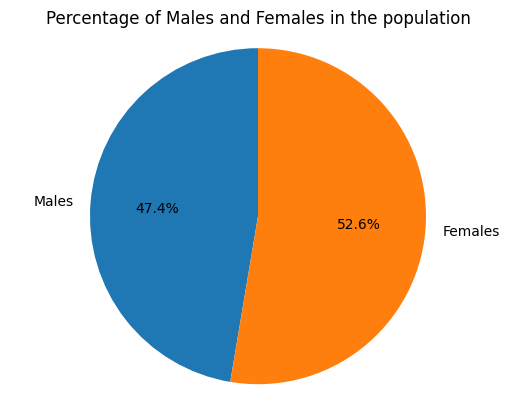

In [23]:
#Let us first check the distribution in the population

# Data
labels = ['Males', 'Females']
sizes = [1066, 1185]  # number of males and females in the population
colors = ['#1f77b4', '#ff7f0e']  # colors for each section

# Pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Males and Females in the population')
plt.show()

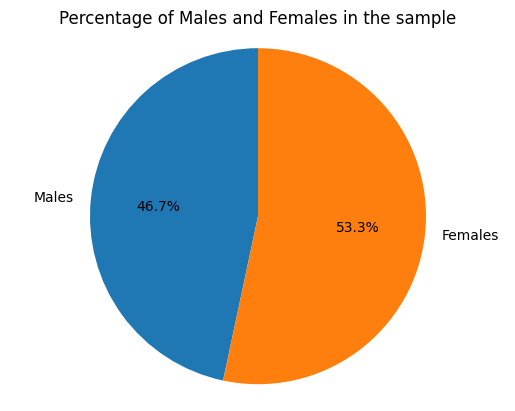

In [32]:
#Let us now check the distribution in the sample

# Data
labels = ['Males', 'Females']
sizes = [168, 192]  # number of males and females in the sample
colors = ['#1f77b4', '#ff7f0e']  # colors for each section

# Pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Males and Females in the sample')
plt.show()

In [35]:
#Let us now check whether the distribution of gender in the population and sample is the same

# Observed frequencies from your sample
observed_frequencies = [168, 192]  # [Male, Female]

# Total individuals in the population
population_total = 1066 + 1185  # Males + Females

# Expected proportions based on the population
expected_proportions = [1066 / population_total, 1185 / population_total]

# Total sample size
sample_total = sum(observed_frequencies)

# Expected frequencies calculated from the sample size
expected_frequencies = [sample_total * prop for prop in expected_proportions]

# Chi-squared test
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)


Chi-squared Statistic: 0.06876323018342162
P-value: 0.7931460994745752


Checking the distribution of the stream

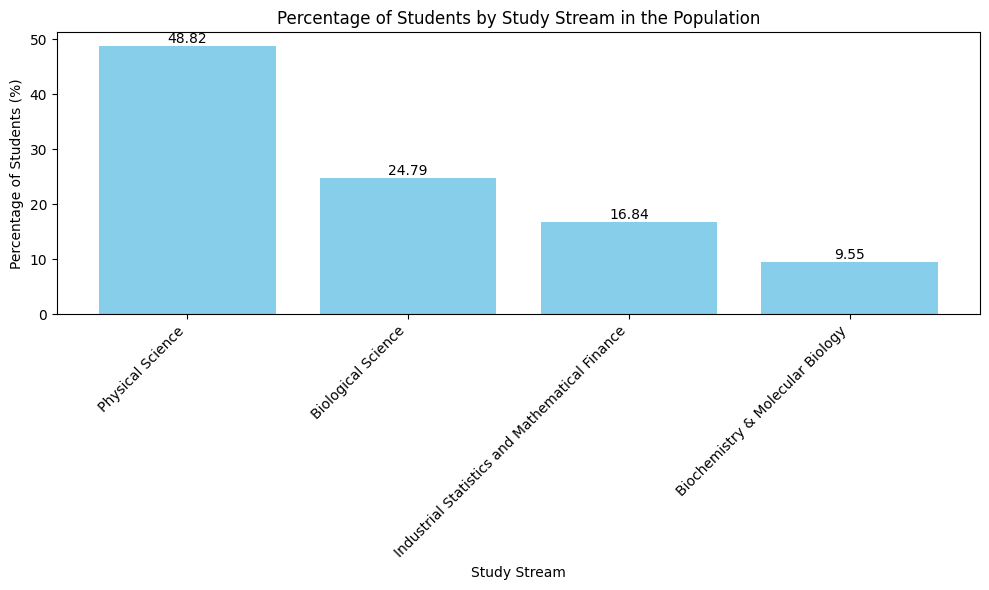

In [41]:
#Finding the distribution of the stream in the population

# Creating a DataFrame from the data
data = {
    'Study_Stream': [
        'Physical Science',
        'Biological Science',
        'Industrial Statistics and Mathematical Finance',
        'Biochemistry & Molecular Biology'
    ],
    'Counts': [1099, 558, 379, 215]
}

data = pd.DataFrame(data)

# Calculating percentages
total = data['Counts'].sum()
data['Percentages'] = (data['Counts'] / total) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(data['Study_Stream'], data['Percentages'], color='skyblue')
plt.xlabel('Study Stream')
plt.ylabel('Percentage of Students (%)')
plt.title('Percentage of Students by Study Stream in the Population')
plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better visibility


# Adding percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')  # va: vertical alignment

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

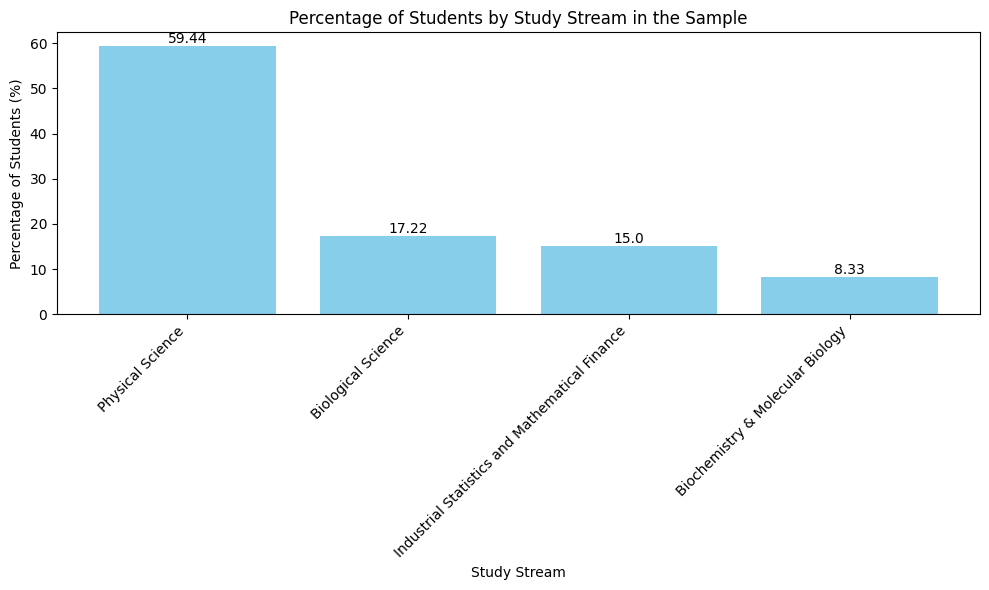

In [40]:
#Finding the distribution of the stream in the sample

# Creating a DataFrame from the data
data = {
    'Study_Stream': [
        'Physical Science',
        'Biological Science',
        'Industrial Statistics and Mathematical Finance',
        'Biochemistry & Molecular Biology'
    ],
    'Counts': [214, 62, 54, 30]
}

data = pd.DataFrame(data)

# Calculating percentages
total = data['Counts'].sum()
data['Percentages'] = (data['Counts'] / total) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(data['Study_Stream'], data['Percentages'], color='skyblue')
plt.xlabel('Study Stream')
plt.ylabel('Percentage of Students (%)')
plt.title('Percentage of Students by Study Stream in the Sample')
plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better visibility


# Adding percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')  # va: vertical alignment

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [43]:
# Create a DataFrame from the population data
data_population = {
    'Study_Stream': [
        'Physical Science',
        'Biological Science',
        'Industrial Statistics and Mathematical Finance',
        'Biochemistry & Molecular Biology'
    ],
    'Counts': [1099, 558, 379, 215]
}
df_population = pd.DataFrame(data_population)

# Create a DataFrame from the sample data
data_sample = {
    'Study_Stream': [
        'Physical Science',
        'Biological Science',
        'Industrial Statistics and Mathematical Finance',
        'Biochemistry & Molecular Biology'
    ],
    'Counts': [214, 62, 54, 30]
}
df_sample = pd.DataFrame(data_sample)

# Calculate total counts from population and sample for normalization
total_population = df_population['Counts'].sum()
total_sample = df_sample['Counts'].sum()

# Calculate expected counts based on population proportions
df_sample['Expected'] = df_population['Counts'] / total_population * total_sample

# Perform the chi-squared goodness of fit test
chi_square_stat, p_value = chisquare(f_obs=df_sample['Counts'], f_exp=df_sample['Expected'])

print(f"Chi-squared Statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

Chi-squared Statistic: 17.914615209976972
P-value: 0.0004580492005843308


Checking the distribution of the academic year

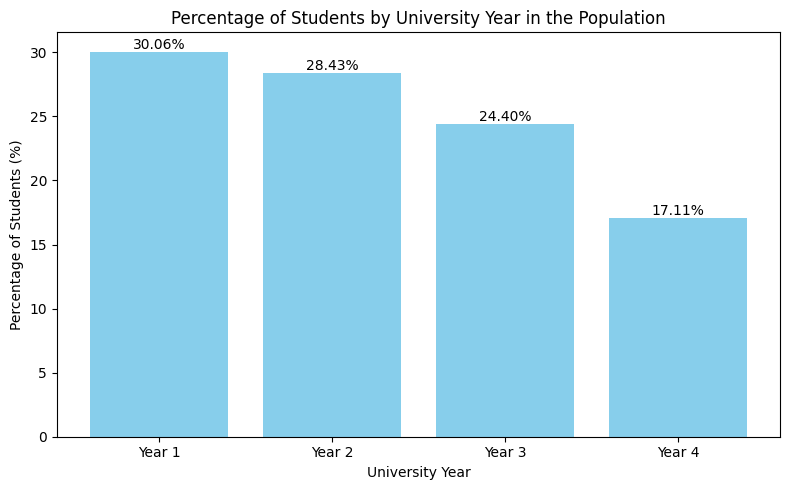

In [48]:
#Checking the distribution in the population
# Creating a DataFrame from your data
data = {
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Counts': [680, 643, 552,387]
}

data = pd.DataFrame(data)

# Calculating percentages
total = data['Counts'].sum()
data['Percentages'] = (data['Counts'] / total) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(data['Uni_Year'], data['Percentages'], color='skyblue')
plt.xlabel('University Year')
plt.ylabel('Percentage of Students (%)')
plt.title('Percentage of Students by University Year in the Population')
plt.xticks(rotation=0)  # No need to rotate for short labels

# Adding percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center')  # va: vertical alignment

plt.tight_layout()  # Adjust layout to make room for labels if necessary
plt.show()

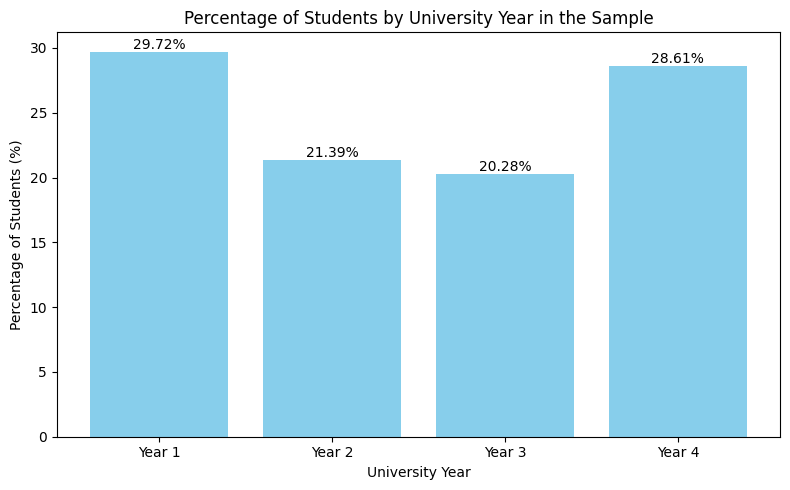

In [47]:
#Checking the distribution in the sample
# Creating a DataFrame from your data
data = {
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Counts': [107, 77, 73,103]
}

data = pd.DataFrame(data)

# Calculating percentages
total = data['Counts'].sum()
data['Percentages'] = (data['Counts'] / total) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(data['Uni_Year'], data['Percentages'], color='skyblue')
plt.xlabel('University Year')
plt.ylabel('Percentage of Students (%)')
plt.title('Percentage of Students by University Year in the Sample')
plt.xticks(rotation=0)  # No need to rotate for short labels

# Adding percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center')  # va: vertical alignment

plt.tight_layout()  # Adjust layout to make room for labels if necessary
plt.show()

In [49]:
#Let us now see if the distribution in the sample and population are significantly different

# Data for the population distribution
data_population = {
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Counts': [680, 643, 552, 387]
}
df_population = pd.DataFrame(data_population)

# Data for the sample distribution
data_sample = {
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Counts': [107, 77, 73, 103]
}
df_sample = pd.DataFrame(data_sample)

# Calculate total counts from population and sample for normalization
total_population = df_population['Counts'].sum()
total_sample = df_sample['Counts'].sum()

# Calculate expected counts based on population proportions
df_sample['Expected'] = df_population['Counts'] / total_population * total_sample

# Perform the chi-squared goodness of fit test
chi_square_stat, p_value = chisquare(f_obs=df_sample['Counts'], f_exp=df_sample['Expected'])

print(f"Chi-squared Statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

Chi-squared Statistic: 36.635584551112814
P-value: 5.495140459527581e-08


Finding the weights

In [18]:
"""

The data collected from the sample is not
representative of the population. Hence, post stratification
weights will be calculated using the stream and year of study
to ensure that the results generated from the sample
is representative of the population.

"""

# Group by 'Uni_Year' and 'Study_Stream' and count the occurrences
combination_counts = df.groupby(['Uni_Year', 'Study_Stream']).size()

# Reset the index to make it more readable and give the count column a name
combination_counts = combination_counts.reset_index(name='Count')

# Display the result
combination_counts

,Uni_Year,Study_Stream,Count
0,Year 1,Biochemistry & Molecular Biology,14
1,Year 1,Biological Science,18
2,Year 1,Industrial Statistics and Mathematical Finance,10
3,Year 1,Physical Science,65
4,Year 2,Biochemistry & Molecular Biology,3
5,Year 2,Biological Science,15
6,Year 2,Industrial Statistics and Mathematical Finance,11
7,Year 2,Physical Science,48
8,Year 3,Biochemistry & Molecular Biology,7
9,Year 3,Biological Science,14


In [19]:
# Create the distribution of values in the Sample
data = {
    'Uni_Year': ['Year 1', 'Year 1', 'Year 1', 'Year 1', 'Year 2', 'Year 2', 'Year 2', 'Year 2', 
                 'Year 3', 'Year 3', 'Year 3', 'Year 3', 'Year 4', 'Year 4', 'Year 4', 'Year 4'],
    'Study_Stream': ['Biochemistry & Molecular Biology', 'Biological Science', 
                     'Industrial Statistics and Mathematical Finance', 'Physical Science',
                     'Biochemistry & Molecular Biology', 'Biological Science', 
                     'Industrial Statistics and Mathematical Finance', 'Physical Science',
                     'Biochemistry & Molecular Biology', 'Biological Science', 
                     'Industrial Statistics and Mathematical Finance', 'Physical Science',
                     'Biochemistry & Molecular Biology', 'Biological Science', 
                     'Industrial Statistics and Mathematical Finance', 'Physical Science'],
    'Count': [14, 18, 10, 65, 3, 15, 11, 48, 7, 14, 17, 35, 6, 15, 16, 66]
}
sample_df = pd.DataFrame(data)

# Create the distribution of values in the Population
population_data = {
    'Uni_Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 1', 'Year 2', 'Year 3', 'Year 4',
                 'Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'Study_Stream': ['Physical Science', 'Physical Science', 'Physical Science', 'Physical Science',
                     'Biological Science', 'Biological Science', 'Biological Science', 'Biological Science',
                     'Industrial Statistics and Mathematical Finance', 'Industrial Statistics and Mathematical Finance', 
                     'Industrial Statistics and Mathematical Finance', 'Industrial Statistics and Mathematical Finance',
                     'Biochemistry & Molecular Biology', 'Biochemistry & Molecular Biology',
                     'Biochemistry & Molecular Biology', 'Biochemistry & Molecular Biology'],
    'Population': [318, 324, 266, 191, 165, 154, 131, 108, 122, 115, 93, 49, 75, 39, 62, 39]
}
population_df = pd.DataFrame(population_data)



In [20]:
#Now to calculate the post stratification weights

# Calculate total counts for normalization
total_sample = sample_df['Count'].sum()
total_population = population_df['Population'].sum()

# Calculate percentages
sample_df['Sample_Percentage'] = (sample_df['Count'] / total_sample) * 100
population_df['Population_Percentage'] = (population_df['Population'] / total_population) * 100

# Merge sample and population dataframes
merged_df = pd.merge(sample_df, population_df, on=['Uni_Year', 'Study_Stream'])

# Calculate the post-stratification weights
merged_df['Post_Stratification_Weight'] = merged_df['Population_Percentage'] / merged_df['Sample_Percentage']

# List of columns to drop
columns_to_drop = ['Count', 'Population', 'Sample_Percentage', 'Population_Percentage']

# Drop the specified columns
merged_df.drop(columns=columns_to_drop, inplace=True)

# Merge the weights back into the original DataFrame
df = df.merge(merged_df, on=['Uni_Year', 'Study_Stream'], how='left')


Creating the BMI Column

In [21]:
#Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, float('inf')]  # Using float('inf') for the upper bound of the last bin
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Categorize BMI using defined bins and labels
df['Weight_Status'] = pd.cut(df['BMI'], bins=bins, labels=labels)


Discarding the unnecessary columns

In [22]:
"""

Some of the variables contain repetitive information.
For example, the Weight_Status column contains the information of 
BMI, Height, Weight. Hence, it is better to drop the columns which
have repetitive information.

"""


# List of columns to drop 
columns_to_drop = [
    'Consent',
    'Weight', 
    'Height',
    'Interest_Loss_Frequency', 
    'Depression_Frequency',
    'Sleep_Problems_Frequency', 
    'Fatigue_Frequency',
    'Appetite_Change_Frequency', 
    'Self_Esteem_Issues_Frequency',
    'Concentration_Issues_Frequency', 
    'Psychomotor_Changes_Frequency',
    'Suicidal_Thoughts_Frequency',
    'depression_score',
    'BMI'
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


Checking for duplicates

In [23]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Exporting the Data to use for Visualization

In [25]:
df.to_excel("Data/Visualization_Data.xlsx",index = False)